# WINE QUALITY PREDICTION USING RANDOM FOREST

### Author : Helana Kuriakose

# Problem

There is a wine manufacturing company. The company is producing different types of wine. As a data scientist, you need to evaluate the quality of the wine based on different chemical parameters such as acidity, citric acid, suger content etc.

# WorkFlow

##### 1)	Data collection 

##### 2)    Data Pre-processing

##### 3)	Train – Test data

##### 4)	Model Training

##### 5)	Model Evaluation

##### 6)	Making Prediction

In [1]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Data collection

In [2]:
# importing data into a pandas dataframe

wine_df  = pd.read_csv('F:\python\winequality-red.csv')

In [3]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# check the number of rows and columns

wine_df.shape

(1599, 12)

In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# getting the features

wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Handling missing values

In [7]:
# checking the missing values

wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Handling duplicates

In [8]:
# checking the duplicate values

wine_df.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [9]:
wine_df.duplicated().sum()

240

In [10]:
wine_df.drop_duplicates(inplace = True)

In [11]:
wine_df.shape

(1359, 12)

# Data analysis and visualization

In [12]:
# statistical measurement of dataset

wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


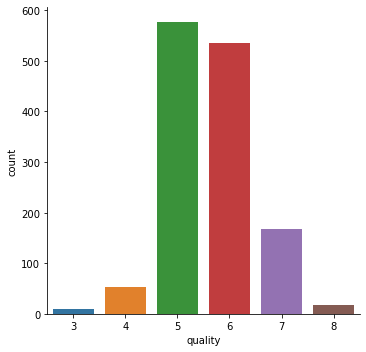

In [13]:
# checking the number of values in each quality 

sb.catplot(data = wine_df, x = 'quality', kind = 'count')

Now we are going to find the relation between each parameters with the quality.

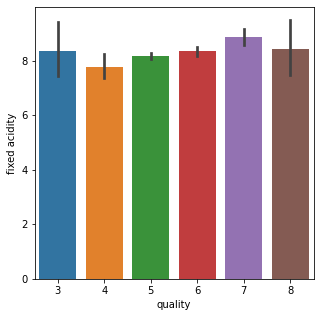

In [16]:
# fixed acidity v/s quality

plot = plt.figure(figsize=(5,5))
sb.barplot(data = wine_df, x = 'quality', y = 'fixed acidity')

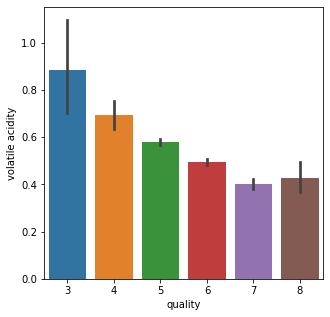

In [15]:
# volatile acidity v/s quality

plot = plt.figure(figsize=(5,5))
sb.barplot(data = wine_df, x = 'quality', y = 'volatile acidity')

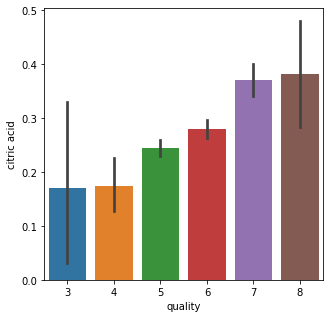

In [16]:
# citric acid v/s quality

plot = plt.figure(figsize=(5,5))
sb.barplot(data = wine_df, x = 'quality', y = 'citric acid')

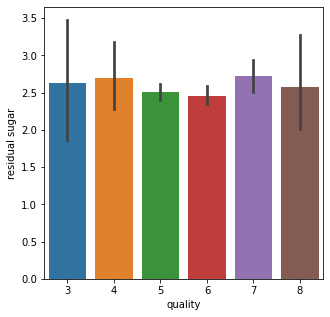

In [17]:
# residual sugar v/s quality

plot = plt.figure(figsize=(5,5))
sb.barplot(data = wine_df, x = 'quality', y = 'residual sugar')

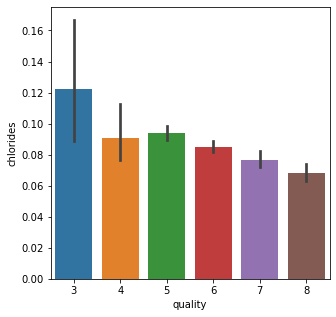

In [18]:
# chlorides v/s quality

plot = plt.figure(figsize=(5,5))
sb.barplot(data = wine_df, x = 'quality', y = 'chlorides')

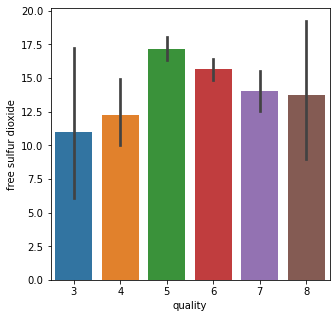

In [19]:
# free sulfur dioxide v/s quality

plot = plt.figure(figsize=(5,5))
sb.barplot(data = wine_df, x = 'quality', y = 'free sulfur dioxide')

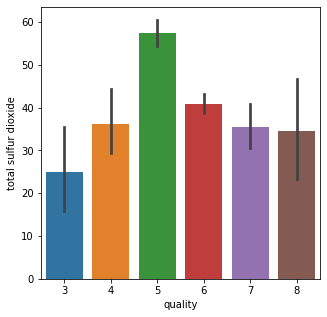

In [20]:
# total sulfur dioxide v/s quality

plot = plt.figure(figsize=(5,5))
sb.barplot(data = wine_df, x = 'quality', y = 'total sulfur dioxide')

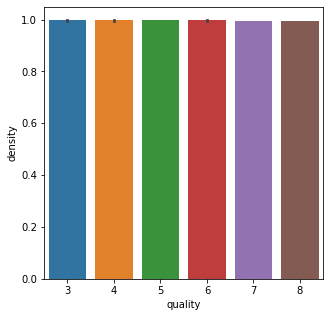

In [21]:
# density v/s quality

plot = plt.figure(figsize=(5,5))
sb.barplot(data = wine_df, x = 'quality', y = 'density')

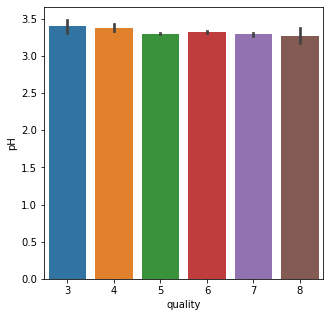

In [22]:
# pH v/s quality

plot = plt.figure(figsize=(5,5))
sb.barplot(data = wine_df, x = 'quality', y = 'pH')

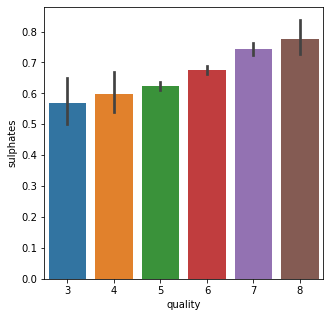

In [23]:
# sulphates v/s quality

plot = plt.figure(figsize=(5,5))
sb.barplot(data = wine_df, x = 'quality', y = 'sulphates')

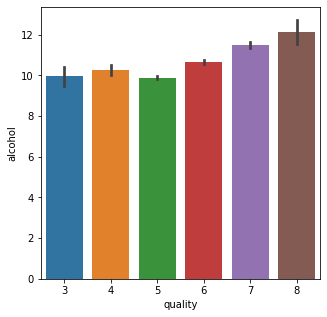

In [24]:
# alcohol v/s quality

plot = plt.figure(figsize=(5,5))
sb.barplot(data = wine_df, x = 'quality', y = 'alcohol')

## Correlation

There are 2 type of correlation. Possitive correlation and negative correlation. We are going to find the correlation of the parameters using heatmap.

In [25]:
correlation = wine_df.corr()

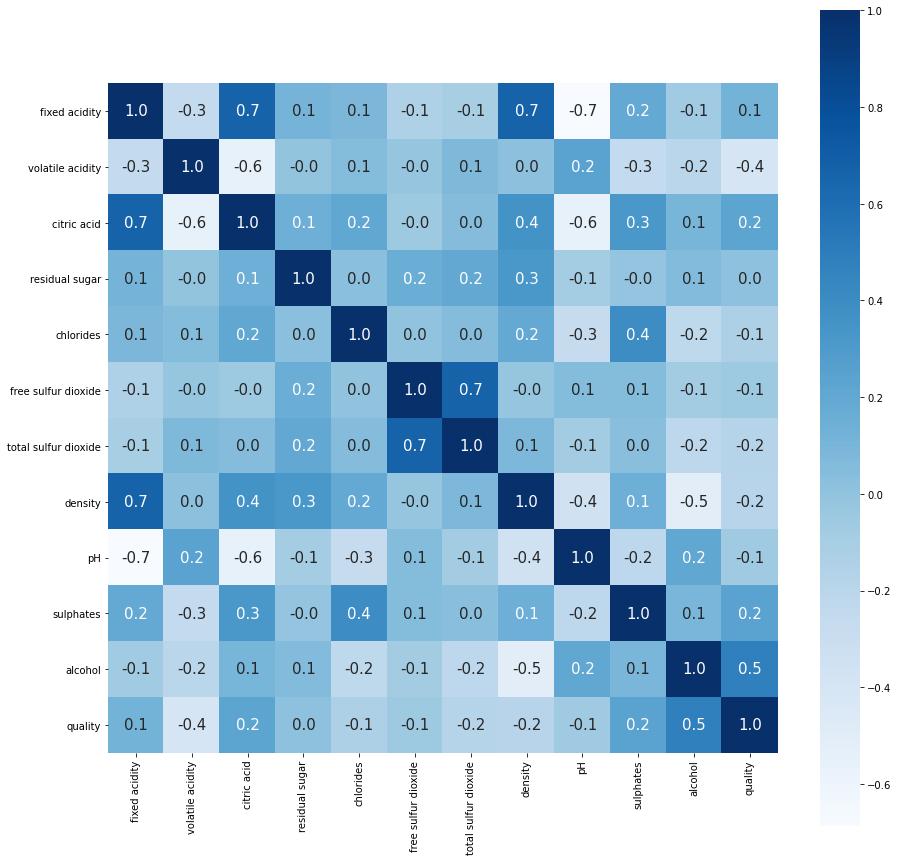

In [26]:
# plotting heatmap

plt.figure(figsize=(15,15))
sb.heatmap(correlation, cbar = True, square = True, fmt ='0.1f', annot = True, annot_kws = {'size':15}, cmap = 'Blues')

# cbar = color bar
# fmt = number of floating points
# annot = annotations
# annot_kws = size of annotation
# cmap = color of the map

# Data pre-processing

In [27]:
# seperate the data and label(target)

x = wine_df.drop(['quality'], axis = 1)

In [28]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


Before seperating the label values, we have 3,4,5,6,7,8 quality values.We ant to get only 2 values in which the quality of wine is good or bad. So we are doing Label Binerization here using one lambda function.

# Label Binerization

In [29]:
y = wine_df['quality'].apply(lambda y_value:1 if y_value >= 7 else 0)

In [30]:
y.head()

0    0
1    0
2    0
3    0
5    0
Name: quality, dtype: int64

# Train - Test Split

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

In [32]:
# checking the size of train and test set

print("x size :",x.shape)
print("x-train size :",x_train.shape)
print("x_test size :",x_test.shape)
print("y size :",y.shape)
print("y-train size :",y_train.shape)
print("y_test size :",y_test.shape)

x size : (1359, 11)
x-train size : (1087, 11)
x_test size : (272, 11)
y size : (1359,)
y-train size : (1087,)
y_test size : (272,)


# Model training

In [33]:
from sklearn.ensemble import RandomForestClassifier
RFClassifier = RandomForestClassifier()
RFClassifier.fit(x_train, y_train)

RandomForestClassifier()

In [34]:
# predicting values

y_pred = RFClassifier.predict(x_test)

# Model evaluation

In [35]:
from sklearn.metrics import accuracy_score
testing_accuracy = round(accuracy_score(y_pred, y_test)*100,3)
print("Accuracy score of Test data in Random Forest Model is",testing_accuracy)

Accuracy score of Test data in Random Forest Model is 90.809


# Building a predictive system 

In [36]:
input_data = (8.9,0.62,0.19,3.9,0.17,51.0,148.0,0.9986,3.17,0.93,9.2)

# changing the input data into a numpy array

input_data_as_array = np.asarray(input_data)

# reshape the input data as we are predicting the label only for single instance

input_data_reshaped = input_data_as_array.reshape(1,-1)
prediction = RFClassifier.predict(input_data_reshaped)
if (prediction[0]==1):
    print("The wine quality is good")
else:
    print("The wine quality is bad")


The wine quality is bad
